In [1]:
# Since data is complex, we cannot use K-means here
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# kmodes was installed with "conda install -c conda-forge kmodes" command in anaconda prompt
# kprototypes supports both categorical and numerical data while kmodes only supports categorical data
# Dataset has both categorical and numerical data
from kmodes.kprototypes import KPrototypes

In [3]:
df = pd.read_csv("segmentation-data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
# Look into dataset to see if there are any null
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
# Income and Age Data Normalization 
# Before Scaling/Normalization we keep our normal values in temp variables
df_temp = df[['ID', 'Age', 'Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [6]:
# Scaling Process
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [7]:
# Since ID is not used in analysis, Drop ID before analysis
df = df.drop(['ID'], axis = 1)

In [8]:
# Convert age and income into float
# Kprototypes requires float data for numerical values
mark_array = df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [9]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [11]:
# Building model

kproto = KPrototypes(n_clusters = 10, verbose = 2, max_iter = 20)
# List contains index of categorical columns 
clusters = kproto.fit_predict(mark_array, categorical = [0, 1, 3, 5, 6])

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 801, ncost: 171.27942196701477
Run: 1, iteration: 2/20, moves: 165, ncost: 170.23504674099547
Run: 1, iteration: 3/20, moves: 62, ncost: 170.02925451359022
Run: 1, iteration: 4/20, moves: 42, ncost: 169.8881127981173
Run: 1, iteration: 5/20, moves: 26, ncost: 169.84356098150943
Run: 1, iteration: 6/20, moves: 7, ncost: 169.83997684197067
Run: 1, iteration: 7/20, moves: 1, ncost: 169.83937789929863
Run: 1, iteration: 8/20, moves: 0, ncost: 169.83937789929863
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 708, ncost: 180.1436148761926
Run: 2, iteration: 2/20, moves: 188, ncost: 178.31446808734827
Run: 2, iteration: 3/20, moves: 154, ncost: 162.50854932660326
Run: 2, iteration: 4/20, moves: 130, ncost: 161.4190495870884
Run: 2, iteration: 5

10

In [12]:
cluster_col = []
for c in clusters:
    cluster_col.append(c)
    
df['cluster'] = cluster_col

# Put original columns from temp variable to df
df[['ID', 'Age', 'Income']] = df_temp

In [13]:
# After clustering, you can now easily get lists of your customers for each cluster or segment
df[df['cluster'] == 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
2,0,0,49,1,89210,0,0,0,100000003
5,0,0,35,1,144848,0,0,0,100000006
16,0,0,53,1,125550,1,0,0,100000017
22,0,0,48,1,89804,0,0,0,100000023
23,0,0,44,1,134918,1,2,0,100000024
42,0,0,44,1,133658,0,0,0,100000043
46,0,0,39,1,140182,1,0,0,100000047
48,0,0,39,1,130500,0,0,0,100000049
68,0,0,37,1,106978,1,2,0,100000069
71,0,0,46,1,73703,0,0,0,100000072


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


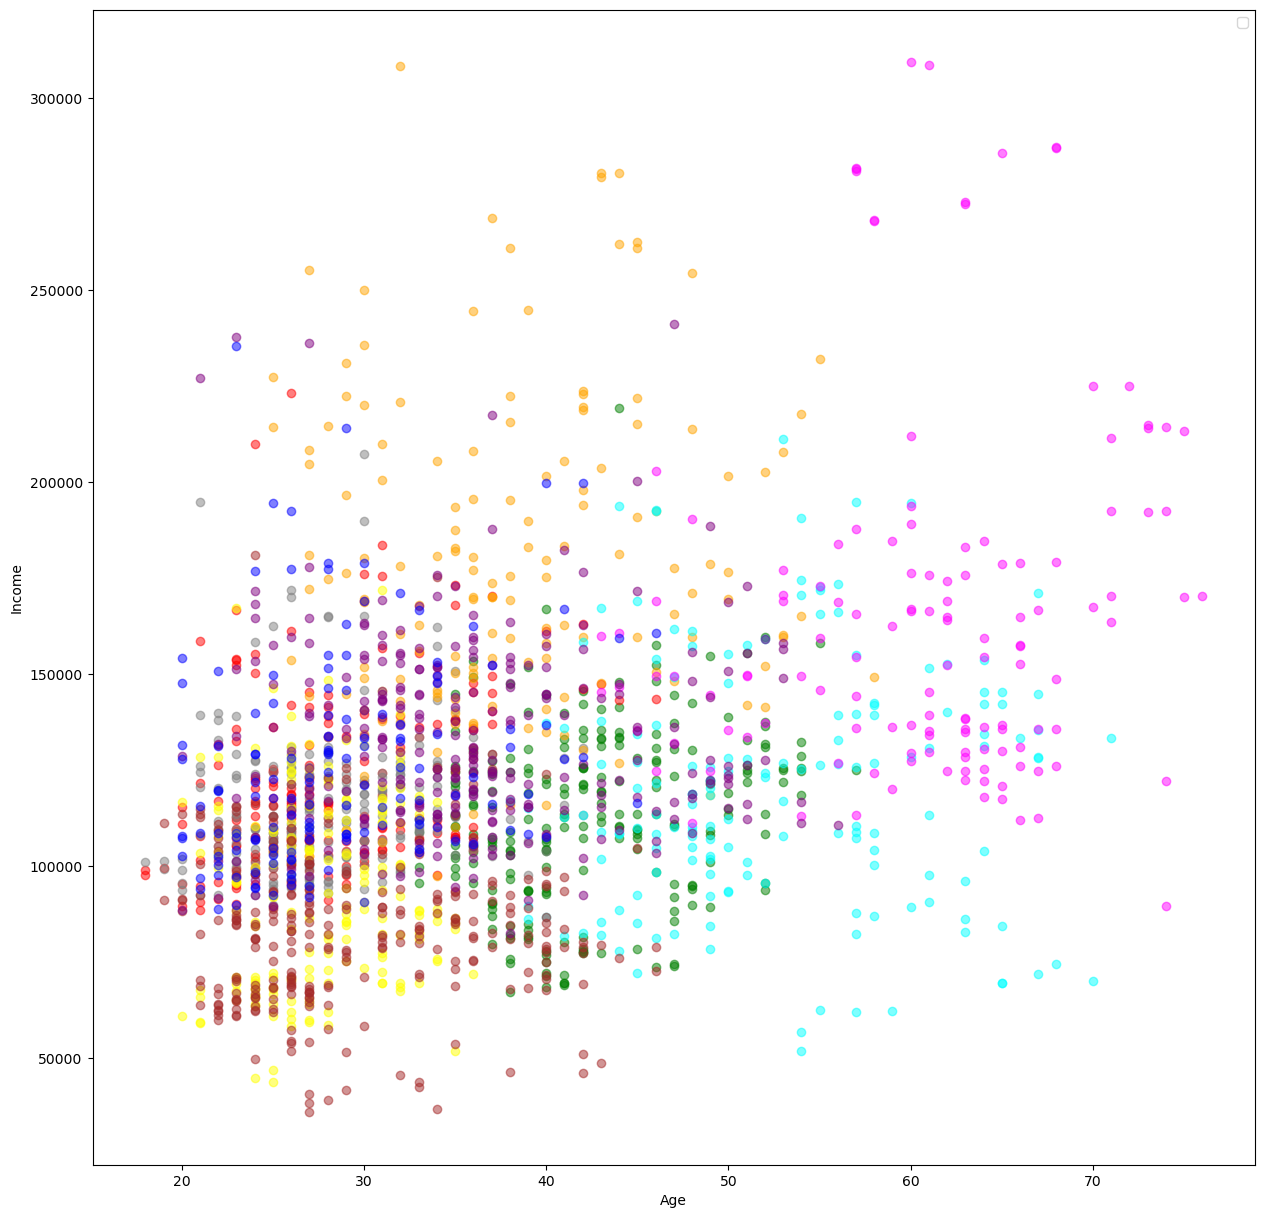

In [14]:
colors = ['green', 'red', 'gray', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'purple', 'blue']

plt.figure(figsize = (15, 15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10), colors):
    dftemp = df[df.cluster == i]
    plt.scatter(dftemp.Age, dftemp['Income'], color = col, alpha = 0.5)
    
plt.legend()
plt.show()